平均値の危険関数の近似値： 0.0739577777777778
中央値の危険関数の近似値： 0.19753611111111113
平均値のベイズ危険関数の近似値： 0.07720277777777779
0.5488135039273248
[0 0 1 1 0 1 0 0 1 0]
6 4
(0.00043290043290043285, 4.8061602797625815e-18)


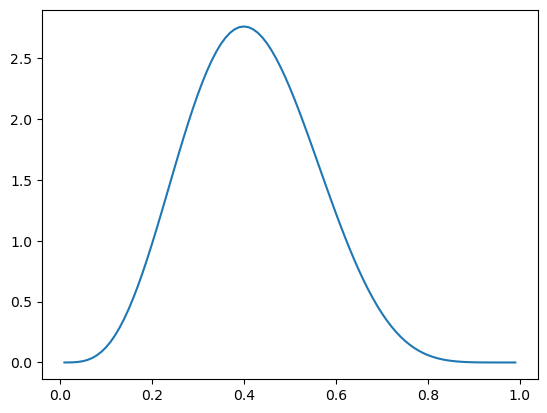

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
theta = 1/3
n = 3
list_loss = []
for i in range(200000):
    array_x = np.random.binomial(1, theta, n)
    loss = (theta - np.mean(array_x))**2
    list_loss += [loss]
risk = np.mean(list_loss)
print('平均値の危険関数の近似値：',risk)



np.random.seed(0)
theta = 1/3
n = 3
list_loss = []
for i in range(200000):
    array_x = np.random.binomial(1, theta, n)
    loss = (theta - np.median(array_x))**2
    list_loss += [loss]
risk = np.mean(list_loss)
print('中央値の危険関数の近似値：',risk)



np.random.seed(0)
list_theta = [1/3, 1/2, 2/3]
list_ptheta = [1/3, 1/3, 1/3]
n = 3
bayesrisk = 0
for index in range(3):
    theta = list_theta[index]
    list_loss = []
    for i in range(200000):
        array_x = np.random.binomial(1, theta, n)
        loss = (theta - np.mean(array_x))**2
        list_loss += [loss]
    risk = np.mean(list_loss)
    bayesrisk += list_ptheta[index]*risk
print('平均値のベイズ危険関数の近似値：',bayesrisk)



np.random.seed(0)
array_rand = np.random.uniform(0, 1, 1)
true_theta = array_rand[0]
print(true_theta)
n = 10
array_x = np.random.binomial(1, true_theta, n)
print(array_x)
c1 = sum(array_x)
c0 = n-c1
print(c0, c1)



from scipy.integrate import quad
def f(theta):
    return (theta**c1)*((1-theta)**c0)

px = quad(f, 0, 1)
print(px)
array_theta = np.arange(0.01, 1, 0.01)
list_post_theta = []
for theta in array_theta:
    list_post_theta += [f(theta)/px[0]]
plt.plot(array_theta, list_post_theta)
